# Lego Dataset Analysis

The dataset used in this analysis was provided as part of a course module, the data range is up to the year 2020. More recent data is available at the Rebrickable source: https://rebrickable.com/downloads/

<img src='assets/bricks.jpg'>

## Data Understanding
Investigation and analysis of the following:
1. How many unique colours of LEGO are there?
2. In which year were the first LEGO sets released and what were these sets called?
3. How many types of LEGO products were on offer in the year the company started?
4. What are the top 5 LEGO sets?
5. How do the number of LEGO sets released year-on-year compare?
6. How many differernt LEGO themes are shipped every year?
7. How many themes are there? How many sets does the most popular theme have?
8. How many sets are there per theme?

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
colours = pd.read_csv('colors.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')

## Data Exploration

In [21]:
colours.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


- The 'rgb' column refers to the rgb code of the colour
- The 'is_trans' column shows a bool value for if the colour is transparent(t) or opaque(f) 

1. How many unique colours of LEGO are there?

In [25]:
colours.name.nunique()

135

2. How many transparent colours are there? How many opaque?

In [28]:
colours[colours['is_trans'] == 'f']['is_trans'].value_counts()

is_trans
f    107
Name: count, dtype: int64

In [30]:
colours[colours['is_trans'] == 't']['is_trans'].value_counts()

is_trans
t    28
Name: count, dtype: int64

(Answer)
- There are 28 transparent colours and 107 opaque colours.

## Understanding LEGO Themes vs. LEGO Sets
Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src='assets/lego_themes.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src='assets/lego_sets.png'>

The sets.csv data contains a list of sets over the years and the number of parts that each of these sets contained.


In [34]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [35]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


2. In which year were the first LEGO sets released and what were these sets called?

In [39]:
sets.sort_values('year').head(10)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


(Answer)
- The first LEGO sets were released in 1949 and were called:
- Extra-Large Gift Set (ABB), Large Gift Set (ABB), Medium Gift Set (ABB), Small Brick Set (ABB), Small Doors and Windows Set (ABB)

3. How many types of LEGO products were on offer in the year the company started?

In [43]:
sets[sets['year'] == 1949].count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

(Answer)
- Only 5 differernt LEGO products were on ofer in the year the company started

4. What are the top 5 LEGO sets with the most number of parts?

In [47]:
sets[['name','year','num_parts']].sort_values('num_parts', ascending=False).head()

,name,year,num_parts
15004,The Ultimate Battle for Chima,2015,9987
11183,UCS Millennium Falcon,2017,7541
10551,Hogwarts Castle,2018,6020
295,Taj Mahal,2017,5923
221,Taj Mahal,2008,5922


(Answer)
- The LEGO set with the most number of parts ever released was 'The Ultimate Battle for Chima' set, with nearly 10000 parts
- This is closely followed behind by the 'UCS Millennium Falcon' set released in 2017, with 7541 parts.
- Fun Fact: The Ultimate Battle for Chima set was never released for public purchase, but was a grand prize for the 'Legends of Chima' competition in the July-August 2015 issue of LEGO Club Magazine. It is the rarest Lego set with only 2 copies confirmed to exist.
- https://legolegendsofchima.fandom.com/wiki/The_Ultimate_Battle_for_CHIMA
- https://brickset.com/sets/BIGBOX-1/The-Ultimate-Battle-for-CHIMA

5. How do the number of LEGO sets released year-on-year compare? How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [51]:
sets.head(1)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43


In [52]:
sets.groupby('year').name.count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: name, Length: 71, dtype: int64

In [53]:
set_releases = sets.groupby('year')
set_releases.get_group(1955).name.count()

28

In [55]:
set_releases.get_group(2019).name.count()

840

(Answer)
- The number of releases year-on-year generally follows an upward trend.
- There were 28 sets released in the year 1955 vs 840 sets released in the year 2019.

## Data Visualization

6. How many Lego sets were released year-on-year?

In [62]:
sets_by_year = sets.groupby('year').count()

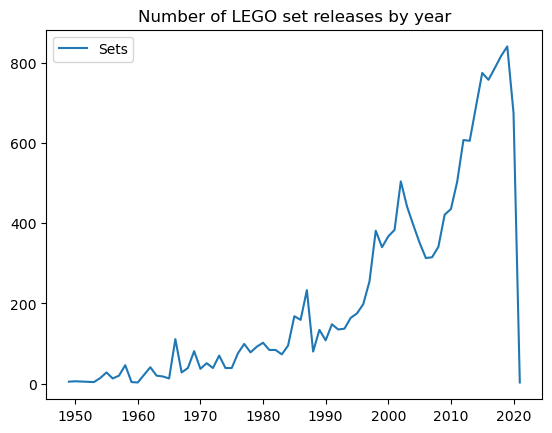

In [63]:
plt.figure()
plt.plot(sets_by_year['set_num'], label='Sets')
plt.title('Number of LEGO set releases by year')
plt.legend()

In [64]:
sets.groupby('year').name.count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: name, Length: 71, dtype: int64

(Answer)
- As previously seen in the answer to 5. there are only 3 sets released in the year 2021. This extreme skew most likely represents incomplete data from when the dataset was taken. The data for the year 2021 can be filtered out to remove this anomaly.

Filtering to remove data for the year 2021:

In [80]:
filtered_data = sets[sets.year.between(1949,2020)]

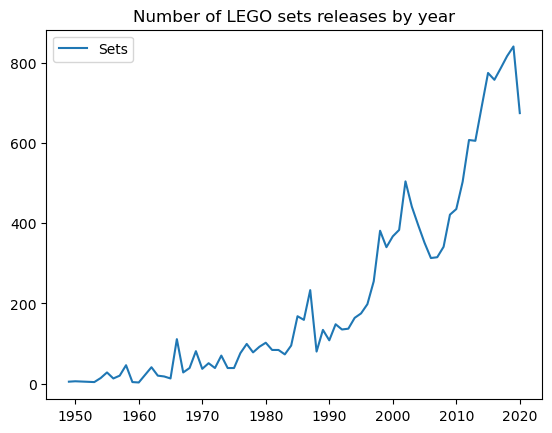

In [82]:
plt.figure()
plt.plot(filtered_data.groupby('year').year.count(), label='Sets')
plt.title('Number of LEGO sets releases by year')
plt.legend()

(Answer)
- Although the data now shows a decline in the number of sets released in the year 2020 compared to previous, it is not on the same company-ending scale as previously shown when including the 2021 data
- The data shows a strong growth between 1990 and 2000, followed by a small dip. After this there is sharp growth which levels off around 2020, followed by another small dip.

7. How many differernt LEGO themes were shipped every year?

In [ ]:
filtered_data.groupby('year').theme_id.nunique()

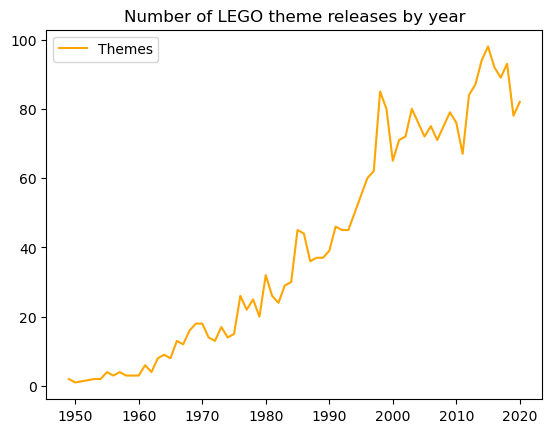

In [85]:
plt.figure()
plt.plot(filtered_data.groupby('year').theme_id.nunique(), color='Orange', label='Themes')
plt.title('Number of LEGO theme releases by year')
plt.legend()

Viewing both sets of data on the same graph:

Text(0, 0.5, 'Number of Lego Themes')

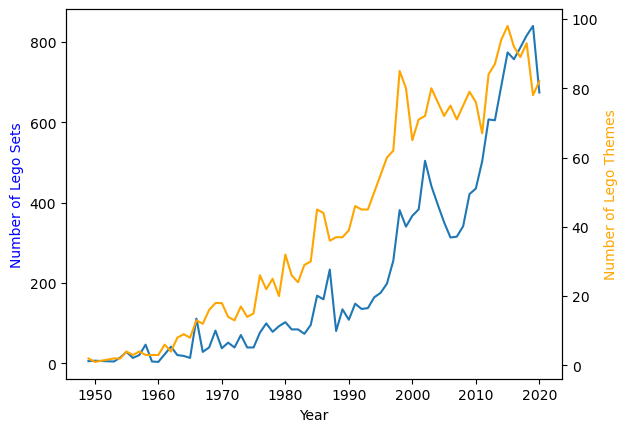

In [87]:
ax1 = plt.gca()
ax2 = plt.twinx()
ax1.plot(filtered_data.groupby('year').year.count(), label='Sets')
ax2.plot(filtered_data.groupby('year').theme_id.nunique(), color='Orange', label='Themes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Lego Sets', color='Blue')
ax2.set_ylabel('Number of Lego Themes', color='Orange')

8. Have Lego sets become more complex over time? What is the average number of parts in a Lego set year-on-year?

In [92]:
filtered_data

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [116]:
avg_number_parts = filtered_data.groupby('year').agg({'num_parts': 'mean'})

In [118]:
avg_number_parts.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [120]:
avg_number_parts.tail()

,num_parts
year,
2016,209.920740
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938


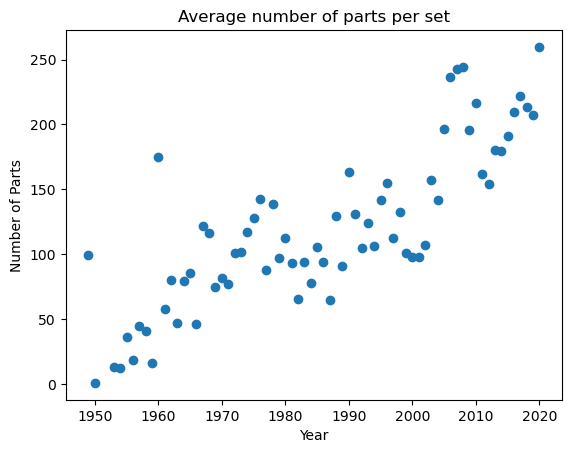

In [179]:
plt.plot()
plt.title('Average number of parts per set')
plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.scatter(avg_number_parts.index, avg_number_parts.num_parts)

(Answer)
- There is an upward trend in the number of parts per Lego set year-on-year with sets in the 1990s containing double the amount of pieces compared to sets in the 1960s.
- In the year 2010, sets contained almost double the number of pieces compared to sets in the 1960s.

## Database schema
The below image illustrates the relationships between the colors, sets and themes tables.
<img src='assets/rebrickable_schema.png'>
- 'theme_id' is a foreign key inside the 'sets' table
- 'id' is a primary key inside the 'themes' table

9. How many ids in the 'themes' table correspond to Star Wars? How many sets does Star Wars have?

Locating all the Star Wars ids from the themes table:

In [204]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [202]:
themes[themes.name == 'Star Wars'].id

17      18
150    158
174    209
211    261
Name: id, dtype: int64

In [208]:
star_wars = themes[themes.name == 'Star Wars'].id

In [220]:
sets[sets.theme_id.isin(star_wars)]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


(Answer)
- Star Wars has 776 different sets

10. What is the number of sets per theme?

In [230]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [232]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


Using the 'sets' data to add up the number of sets per theme_id:

In [241]:
sets.theme_id.value_counts()

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

Converting the series into its own dataframe:

In [243]:
set_themes = sets.theme_id.value_counts()

In [246]:
set_theme_counts = pd.DataFrame({'id': set_themes.index, 'set_count': set_themes.values})

In [251]:
set_theme_counts.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [253]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


As both set_theme_counts and theme dataframes have the same 'id' column now, they can be merged based on this column: 

In [256]:
merged_df = pd.merge(set_theme_counts, themes, on='id')

In [258]:
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


This makes it much easier to identify which themes have the most sets, the above again confirms that Star Wars is the theme with the most sets.

<BarContainer object of 10 artists>

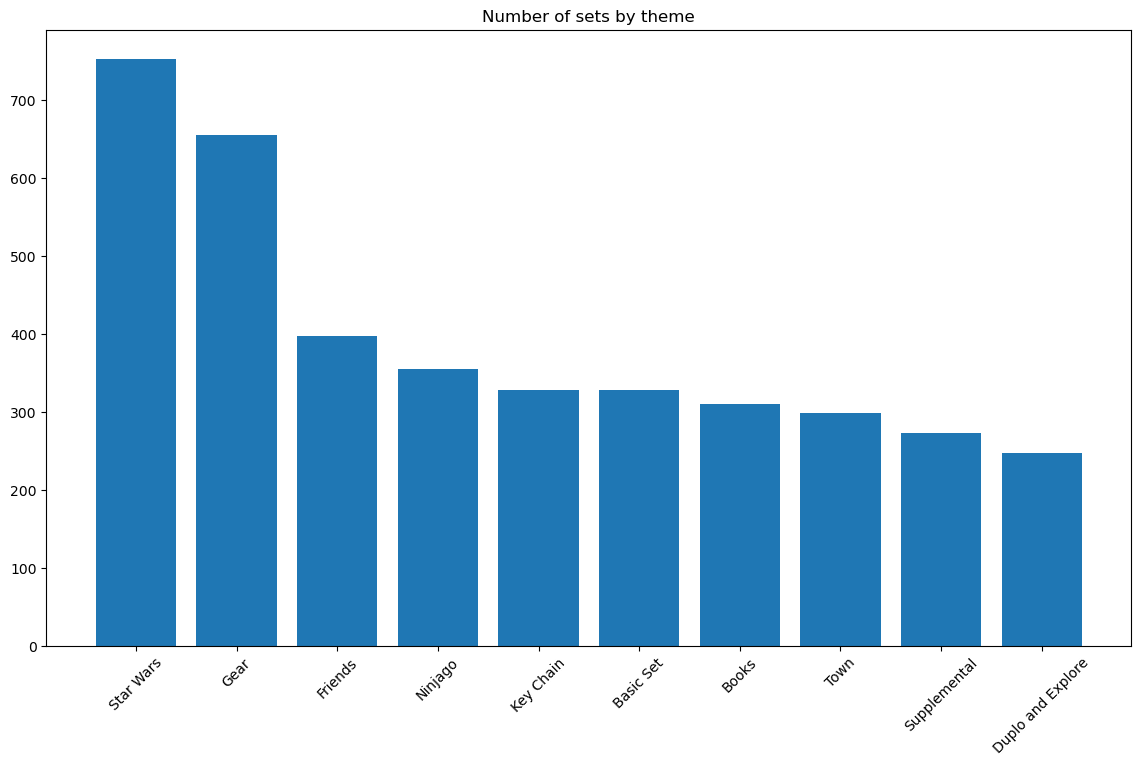

In [295]:
plt.figure(figsize=(14,8))
plt.title('Number of sets by theme')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel=('No of sets')
plt.xlabel=('Theme')
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

(Answer)
- We can see that Star Wars is the theme for which for most sets are produced
- Merchandising and Gear is the next biggest offering
- It is interesting to see that apart from Lego, there are also large offerings for key chains and books.

## Summary
- LEGO has a rich history of innovation and expansion, beginning with the release of its first sets in 1949, which included five different products such as the Extra-Large Gift Set and Small Brick Set (ABB).
- Over time, the variety of LEGO sets has grown significantly, with notable trends in both the number of sets released and their complexity. For example, while only 28 sets were released in 1955, this number rose dramatically to 840 in 2019, highlighting an overall upward trend.
- Additionally, LEGO sets have become increasingly intricate, with modern sets containing significantly more parts than those from earlier decades—sets from the 2010s contained nearly double the number of pieces compared to the 1960s.
- The largest set ever created, "The Ultimate Battle for Chima," includes nearly 10,000 parts, though it remains a rarity, as it was never publicly released.
- Transparent colors represent 28 of LEGO’s 135 unique colors, with the remaining 107 being opaque.
- Star Wars stands out as the most popular theme, while merchandise such as keychains and books also play a significant role in LEGO's offerings.
- The data reveals steady growth through the 1990s, occasional dips, and leveling trends in the 2020s, reflecting LEGO’s ability to adapt and innovate over the decades.

## Further Analysis Suggestions
- Examine the trends of themes over time to get a better idea about consumer preferences during specific time periods
- Examine the correlation of colour against themes to investigation the relationship between the release of new colours and new themes
- Examine how the release of rare or limited edition sets influence the number of themes released over time